In [6]:
import pandas as pd
from pathlib import Path

PROJECT_ROOT_DIR = Path.cwd().parent.parent.parent
PROJECT_ROOT_DIR

file_paths_defending  = ["/data/processed/bundesliga/defending.csv",
               "/data/processed/la_liga/defending.csv",
               "/data/processed/ligue_1/defending.csv",
               "/data/processed/premier_league/defending.csv",
               "/data/processed/serie_a/defending.csv", 
               ]

file_paths_standard_stats  = ["/data/standard_stats_bundesliga.csv",
            "/data/standard_stats_la_liga.csv",
            "/data/standard_stats_ligue_1.csv",
            "/data/standard_stats_premier_league.csv",
            "/data/standard_stats_serie_a.csv",
               ]

PROJECT_ROOT_DIR

df = pd.DataFrame()

# Loop through each file, load the DataFrame, and concatenate
for file in file_paths_standard_stats:
    temp_df = pd.read_csv(f"{PROJECT_ROOT_DIR}{file}")  # Load DataFrame from CSV file
    df = pd.concat([df, temp_df], ignore_index=True)
df = df.set_index("player")

df

,country,team,position,match_played,minutes_played,subbed_in,subbed_out,unique_positions_played,positions_played,full_match_equivalents,league
player,,,,,,,,,,,
Aaron Hunt,Germany,Hamburger SV,Midfielder,23.0,1742.0,3.0,8.0,"['Right Wing', 'Right Defensive Midfield', 'Le...","['Right Center Forward', 'Left Wing', 'Center ...",19.355556,bundesliga
Adam Hloušek,Czech Republic,VfB Stuttgart,Defender,7.0,425.0,3.0,0.0,"['Left Center Back', 'Right Center Midfield', ...","['Left Center Back', 'Left Wing', 'Left Center...",4.722222,bundesliga
Adelino André Vieira Freitas,Portugal,Wolfsburg,Forward,26.0,1908.0,4.0,8.0,"['Right Center Midfield', 'Right Back', 'Left ...","['Right Midfield', 'Right Back', 'Right Midfie...",21.200000,bundesliga
Admir Mehmedi,Switzerland,Bayer Leverkusen,Midfielder,28.0,1373.0,14.0,7.0,"['Left Midfield', 'Right Wing', 'Right Defensi...","['Right Center Forward', 'Left Midfield', 'Rig...",15.255556,bundesliga
Adnan Januzaj,Belgium,Borussia Dortmund,Forward,6.0,176.0,6.0,0.0,"['Center Forward', 'Right Midfield', 'Left Win...","['Right Wing', 'Right Wing', 'Right Wing', 'Le...",1.955556,bundesliga
...,...,...,...,...,...,...,...,...,...,...,...
Ľubomír Tupta,Slovakia,Hellas Verona,NaN,0.0,0.0,0.0,0.0,[],[],0.000000,serie_a
Łukasz Skorupski,Poland,Empoli,Goalkeeper,31.0,2790.0,0.0,0.0,['Goalkeeper'],"['Goalkeeper', 'Goalkeeper', 'Goalkeeper', 'Go...",31.000000,serie_a
Ştefan Daniel Radu,Romania,Lazio,Defender,13.0,1097.0,0.0,3.0,"['Left Center Back', 'Right Center Forward', '...","['Left Center Back', 'Right Center Forward', '...",12.188889,serie_a


# Descriptive Statistics

In [16]:
print(f"Number of players: {df.shape[0]}")
print(f"Number of countries: {df['country'].nunique()}")
print(f"Number of teams: {df['team'].nunique()}")
print(f"Number of leagues: TODO. ") # df['league'].nunique()
df.describe().round(2)

Number of players: 3133
Number of countries: 114
Number of teams: 98
Number of leagues: TODO. 


,match_played,minutes_played,subbed_in,subbed_out,full_match_equivalents
count,3133.00,3133.00,3133.00,3133.00,3133.00
mean,16.16,1164.74,3.34,3.34,12.94
std,12.35,1029.07,4.07,4.30,11.43
min,0.00,0.00,0.00,0.00,0.00
25%,3.00,146.00,0.00,0.00,1.62
50%,16.00,983.00,2.00,2.00,10.92
75%,28.00,2013.00,5.00,5.00,22.37
max,38.00,3420.00,28.00,30.00,38.00


# Missing values
Players who did not play any match do have no positions set. This is due to fact that position will be retrieved from event-data.

In [17]:
# check for count of missing values where count > 0
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

display(df.loc[df["position"].isna(), :])

position    441
dtype: int64


,country,team,position,match_played,minutes_played,subbed_in,subbed_out,unique_positions_played,positions_played,full_match_equivalents
player,,,,,,,,,,
Alexander Stolz,Germany,Hoffenheim,NaN,0.0,0.0,0.0,0.0,[],[],0.0
Aloy Ihenacho,Nigeria,Ingolstadt,NaN,0.0,0.0,0.0,0.0,[],[],0.0
Ashton Philip Shawn Götz,Germany,Hamburger SV,NaN,0.0,0.0,0.0,0.0,[],[],0.0
Bariş Atik,Germany,Hoffenheim,NaN,0.0,0.0,0.0,0.0,[],[],0.0
Benjamin Uphoff,Germany,VfB Stuttgart,NaN,0.0,0.0,0.0,0.0,[],[],0.0
...,...,...,...,...,...,...,...,...,...,...
Valerio Mantovani,Italy,Torino,NaN,0.0,0.0,0.0,0.0,[],[],0.0
Vincenzo Ceci,Italy,Carpi,NaN,0.0,0.0,0.0,0.0,[],[],0.0
Vincenzo Silvestro,Italy,Bologna,NaN,0.0,0.0,0.0,0.0,[],[],0.0


Findings:
- Many players young unkwown have no data. 
- Quiet a few have played only one match
- Many have not fished 90 minutes of playing time

-> Apply pre-filtering to reduce "noisy" players/observations

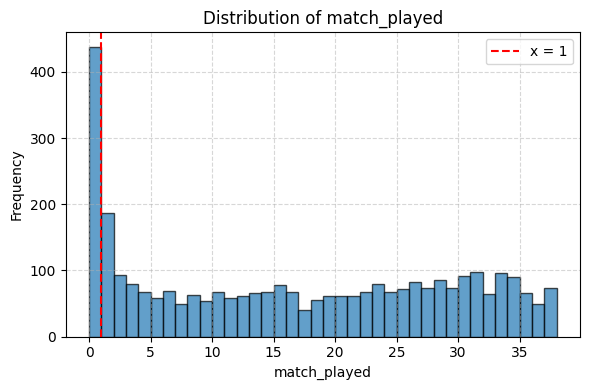

In [18]:
# plot a histogram with title and labels of column df["match_played"]
def histo_plot(df, column, bins=38, x=None):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(6, 4))
    plt.hist(df[column], bins=bins, edgecolor='black', alpha=0.7)
    if x is not None:
        plt.axvline(x=x, color='red', linestyle='--', linewidth=1.5, label=f'x = {x}')
    
    plt.title(f"Distribution of {df['match_played'].name}")
    plt.xlabel(df[column].name)
    plt.ylabel("Frequency")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.legend()
    plt.show()

histo_plot(df, "match_played", x=1)

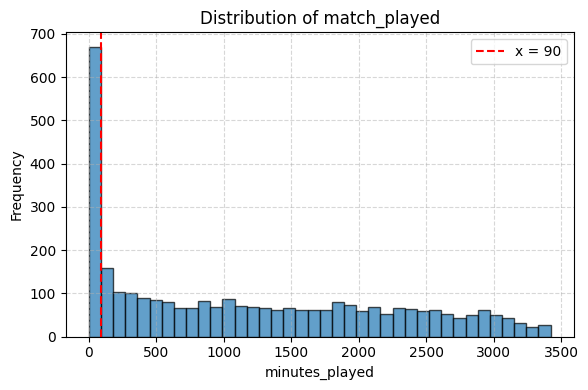

In [19]:
histo_plot(df, "minutes_played",x=90)

reduce noise

In [20]:
df = df.loc[(df["match_played"]>2) &  (df["minutes_played"]>90) ,:]

# Minutes Played

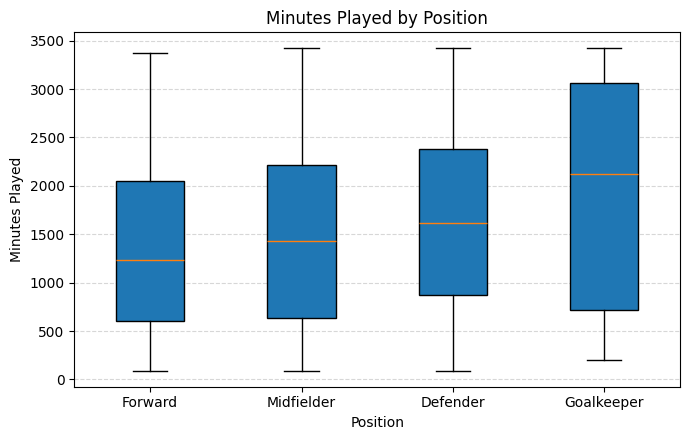

In [21]:
import matplotlib.pyplot as plt

# Filter the data for each position
positions = ["Forward", "Midfielder", "Defender", "Goalkeeper"]
data = [df[df["position"] == position]["minutes_played"] for position in positions]

# Create a single plot with side-by-side boxplots
plt.figure(figsize=(7, 4.5))
plt.boxplot(data, vert=True, patch_artist=True, labels=positions)
plt.title("Minutes Played by Position")
plt.xlabel("Position")
plt.ylabel("Minutes Played")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Match Played

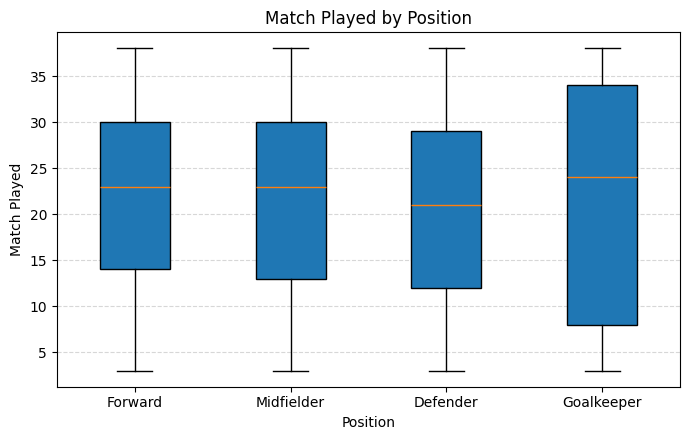

In [22]:
import matplotlib.pyplot as plt

# Filter the data for each position
positions = ["Forward", "Midfielder", "Defender", "Goalkeeper"]
data = [df[df["position"] == position]["match_played"] for position in positions]

# Create a single plot with side-by-side boxplots
plt.figure(figsize=(7, 4.5))
plt.boxplot(data, vert=True, patch_artist=True, labels=positions)
plt.title("Match Played by Position")
plt.xlabel("Position")
plt.ylabel("Match Played")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Subbed in

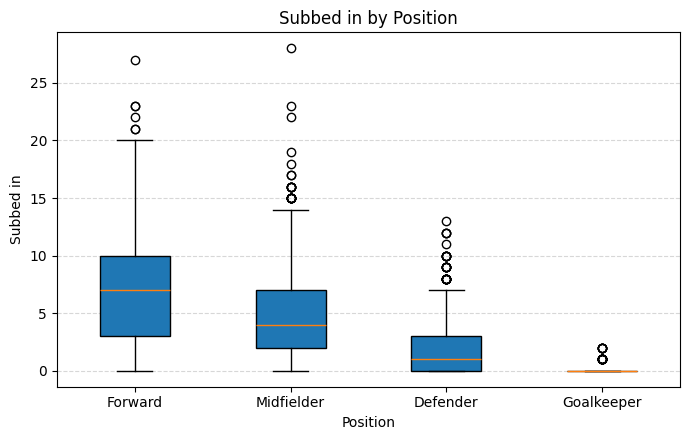

In [23]:
import matplotlib.pyplot as plt

# Filter the data for each position
positions = ["Forward", "Midfielder", "Defender", "Goalkeeper"]
data = [df[df["position"] == position]["subbed_in"] for position in positions]

# Create a single plot with side-by-side boxplots
plt.figure(figsize=(7, 4.5))
plt.boxplot(data, vert=True, patch_artist=True, labels=positions)
plt.title("Subbed in by Position")
plt.xlabel("Position")
plt.ylabel("Subbed in")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Subbed off

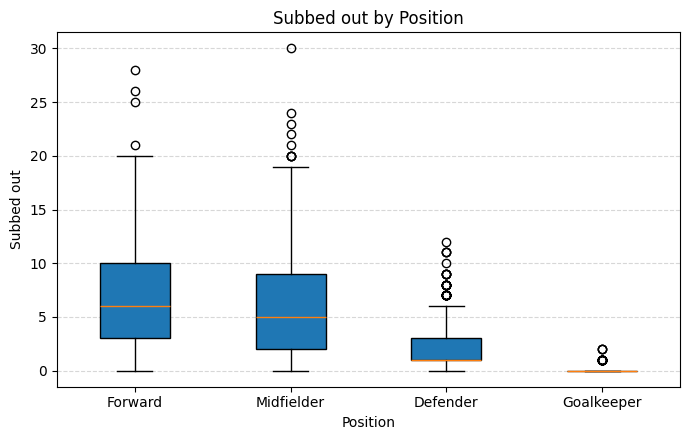

In [24]:
import matplotlib.pyplot as plt

# Filter the data for each position
positions = ["Forward", "Midfielder", "Defender", "Goalkeeper"]
data = [df[df["position"] == position]["subbed_out"] for position in positions]

# Create a single plot with side-by-side boxplots
plt.figure(figsize=(7, 4.5))
plt.boxplot(data, vert=True, patch_artist=True, labels=positions)
plt.title("Subbed out by Position")
plt.xlabel("Position")
plt.ylabel("Subbed out")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()